<a href="https://colab.research.google.com/github/Aditya27V/Devsoc_adi/blob/main/Copy_of_Lin_Reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression

In [ ]:
# Import the required libraries
import pandas as pd

## Data Preprocessing

### **Exploring the dataset**

Let's start with loading the training data from the csv into a pandas dataframe



Load the datasets from GitHub. Train dataset has already been loaded for you in df below. To get test dataset use the commented code.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/cronan03/DevSoc_AI-ML/main/train_processed_splitted.csv')

Let's see what the first 5 rows of this dataset looks like

In [ ]:
df.head()

,LotArea,TotalBsmtSF,GrLivArea,GarageArea,PoolArea,OverallCond,Utilities,SalePrice
0,11553,1051,1159,336,0,5,AllPub,158000
1,8400,1052,1052,288,0,5,AllPub,138500
2,8960,1008,1028,360,0,6,AllPub,115000
3,11100,0,930,308,0,7,AllPub,84900
4,15593,1304,2287,667,0,4,AllPub,225000


What are all the features present? What is the range for each of the features along with their mean?

In [ ]:

df.describe()

,LotArea,TotalBsmtSF,GrLivArea,GarageArea,PoolArea,OverallCond,SalePrice
count,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000
mean,10622.104262,1058.311263,1512.900304,473.480213,2.643075,5.582192,180795.504566
std,10430.181058,435.717809,524.854432,213.960987,39.504255,1.112699,77511.272784
min,1300.000000,0.000000,334.000000,0.000000,0.000000,1.000000,34900.000000
25%,7588.500000,796.000000,1124.250000,336.000000,0.000000,5.000000,130000.000000
50%,9501.500000,992.000000,1461.500000,480.000000,0.000000,5.000000,163250.000000
75%,11613.500000,1295.250000,1775.750000,576.000000,0.000000,6.000000,215000.000000
max,215245.000000,6110.000000,5642.000000,1418.000000,738.000000,9.000000,755000.000000


### **Feature Scaling and One-Hot Encoding**

You must have noticed that some features `(such as Utilities)` are not continuous values.
  
These features contain values indicating different categories and must somehow be converted to numbers so that the computer can understand it. `(Computers only understand numbers and not strings)`
  
These features are called categorical features. We can represent these features as a `One-Hot Representation`
  
  
You must have also noticed that all the other features, each are in a different scale. This can be detremental to the performance of our linear regression model and so we normalize them so that all of them are in the range $[0,1]$

> NOTE: When you are doing feature scaling, store the min/max which you will use to normalize somewhere. This is then to be used at testing time. Try to think why are doing this?

In [ ]:
# Do the one-hot encoding here

#this pd.get_dummies() function converts the string columns to binary 0s and 1s, rather trues and falses
df=pd.get_dummies(df)

#df.head() just shows first 5 rows of our dataset, if we write df.head(10), it will show first 10, 5 is just the default
df.head()


,LotArea,TotalBsmtSF,GrLivArea,GarageArea,PoolArea,OverallCond,SalePrice,Utilities_AllPub,Utilities_NoSeWa
0,11553,1051,1159,336,0,5,158000,True,False
1,8400,1052,1052,288,0,5,138500,True,False
2,8960,1008,1028,360,0,6,115000,True,False
3,11100,0,930,308,0,7,84900,True,False
4,15593,1304,2287,667,0,4,225000,True,False


In [ ]:
# Do the feature scaling here

#basically, wer going to the scikit-learn toolbox, finding the specific tool called MinMaxScaler, This tool's only job is to squish numbers into a 0-to-1 range.
from sklearn.preprocessing import MinMaxScaler

# creates a fresh, ready-to-use copy of that tool and stores it in a variable
scaler = MinMaxScaler()

# Gettin a list of all column names except SalePrice
features_to_scale = [col for col in df.columns if col != 'SalePrice']

# now we applyin the scaler to  the feature columns(only)
df[features_to_scale] = scaler.fit_transform(df[features_to_scale])

# Check the result. All values (except SalePrice) will be betwen 0 and 1
df.head()


,LotArea,TotalBsmtSF,GrLivArea,GarageArea,PoolArea,OverallCond,SalePrice,Utilities_AllPub,Utilities_NoSeWa
0,0.047924,0.172013,0.155426,0.236953,0.0,0.500,158000,1.0,0.0
1,0.033186,0.172177,0.135268,0.203103,0.0,0.500,138500,1.0,0.0
2,0.035804,0.164975,0.130746,0.253879,0.0,0.625,115000,1.0,0.0
3,0.045806,0.000000,0.112283,0.217207,0.0,0.750,84900,1.0,0.0
4,0.066807,0.213421,0.367935,0.470381,0.0,0.375,225000,1.0,0.0


### **Conversion to NumPy**

Ok so now that we have all preprocessed all the data, we need to convert it to numpy for our linear regression model
  
Assume that our dataset has a total of $N$ datapoints. Each datapoint having a total of $D$ features (after one-hot encoding), we want our numpy array to be of shape $(N, D)$

In our task, we have to predict the `SalePrice`. We will need 2 numpy arrays $

*   List item
*   List item

(X, Y)$. These represent the features and targets respectively

In [ ]:
# Convert to numpy array
import numpy as np

# Separate features (X) and target (Y)
X = df.drop('SalePrice', axis=1).to_numpy()  # (N, D)
Y = df['SalePrice'].to_numpy().reshape(-1, 1) # (N, 1)

# Get N (number of samples) and D (number of features) from X
N, D = X.shape

# 1. Initialize parameters (D weights + 1 bias)
# We initialize weights from a "standard normal distribution"
W = np.random.randn(D, 1)
b = np.zeros((1, 1)) # Initialize bias to 0

# 2. Implement the linear equation: Y_pred = X.W + b
# We use @ for matrix multiplication (np.dot)
Y_pred = X @ W + b

# Let's look at our (bad) predictions for the first 5 houses
print("Initial (bad) predictions:")
print(Y_pred[:5])

Initial (bad) predictions:
[[1.74460492]
 [1.67556181]
 [1.92826179]
 [1.92793814]
 [2.21804354]]


## Linear Regression formulation
  
We now have our data in the form we need. Let's try to create a linear model to get our initial (Really bad) prediction


Let's say a single datapoint in our dataset consists of 3 features $(x_1, x_2, x_3)$, we can pose it as a linear equation as follows:
$$ y = w_1x_1 + w_2x_2 + w_3x_3 + b $$
Here we have to learn 4 parameters $(w_1, w_2, w_3, b)$
  
  
Now how do we extend this to multiple datapoints?  
  
  
Try to answer the following:
- How many parameters will we have to learn in the cae of our dataset? (Don't forget the bias term)
- Form a linear equation for our dataset. We need just a single matrix equation which correctly represents all the datapoints in our dataset
- Implement the linear equation as an equation using NumPy arrays (Start by randomly initializing the weights from a standard normal distribution)

In [ ]:
import numpy as np

# --- Placeholder Data (FOR DEMONSTRATION ONLY) ---
# In your notebook, you should already have 'X' (features) and 'Y' (actual values)
# loaded from a previous cell. If so, you can delete this part.
# We create 100 samples (N=100) and 3 features (D=3) as per your prompt.
N_samples = 100
D_features = 3
np.random.seed(42) # To make the random numbers predictable
X = np.random.rand(N_samples, D_features)
# Create a dummy Y with known weights so we can check our work later
Y = (X @ np.array([[10.5], [-3.2], [1.1]])) + 5.5 + (np.random.randn(N_samples, 1) * 0.5)
# --- End of Placeholder Data ---


# --- Your Code Starts Here ---

# Q1: How many parameters?
# A: 3 features (x1, x2, x3) means 3 weights (w1, w2, w3).
#    Plus 1 bias term (b).
#    Total parameters = 3 + 1 = 4.

# Q2: What is the matrix equation?
# A: Y_pred = X @ W + b

# Q3: Implement the linear equation using NumPy

# Get the number of features (D) from our data matrix X.
# X.shape is (N_samples, D_features), so X.shape[1] gives us D.
D = X.shape[1]  # This should be 3

# 1. Initialize parameters (D weights + 1 bias)
print(f"Dataset has {D} features.")

# Initialize weights from a "standard normal distribution"
# We need a weight for each feature. Shape must be (D, 1) or (3, 1).
W = np.random.randn(D, 1)

# Initialize bias to 0
# The bias 'b' is a single scalar. We use (1, 1) for broadcasting.
b = np.zeros((1, 1))

# 2. Implement the linear equation: Y_pred = X.W + b
# We use the '@' operator for matrix multiplication (np.dot)
Y_pred = X @ W + b

# 3. Let's look at our (bad) initial predictions
print("\nInitial (bad) predictions (first 5):")
print(Y_pred[:5])

print(f"\n--- Model Details ---")
print(f"Parameters initialized: {W.size + b.size} (which is {W.size} weights + {b.size} bias)")
print(f"Weights (W) shape: {W.shape}")
print(f"Bias (b) shape: {b.shape}")
print(f"Predictions (Y_pred) shape: {Y_pred.shape}")

Dataset has 3 features.

Initial (bad) predictions (first 5):
[[0.09838626]
 [0.09184453]
 [0.00402079]
 [0.98551433]
 [0.09661614]]

--- Model Details ---
Parameters initialized: 4 (which is 3 weights + 1 bias)
Weights (W) shape: (3, 1)
Bias (b) shape: (1, 1)
Predictions (Y_pred) shape: (100, 1)


How well does our model perform? Try comparing our predictions with the actual values

In [ ]:
# We assume 'Y' (the actual target values) and 'Y_pred' (our predictions
# from the cell above) are both available.

# 1. Compare predictions with actual values (first 5)
print("--- Initial Model Performance Check ---")
print("Actual values (Y) (first 5):")
print(Y[:5])

print("\nOur predictions (Y_pred) (first 5):")
print(Y_pred[:5])

# 2. Calculate the Mean Squared Error (MSE)
# MSE is the average of the squared differences between
# the actual value (Y) and the predicted value (Y_pred).

# Calculate the difference (the "error" or "residual")
error = Y - Y_pred

# Square the errors
squared_error = error ** 2

# Calculate the mean (average) of all the squared errors
mse = np.mean(squared_error)

# You can also write this in a single, more common line:
# mse_one_line = np.mean((Y - Y_pred)**2)

print(f"\nInitial Mean Squared Error (MSE): {mse:.4f}")
print("This MSE is high because the weights are random.")
print("The goal of training is to adjust W and b to make this MSE as low as possible.")

--- Initial Model Performance Check ---
Actual values (Y) (first 5):
[[ 7.21836472]
 [11.13244823]
 [ 5.07131282]
 [14.25275203]
 [12.74859874]]

Our predictions (Y_pred) (first 5):
[[0.09838626]
 [0.09184453]
 [0.00402079]
 [0.98551433]
 [0.09661614]]

Initial Mean Squared Error (MSE): 95.6260
This MSE is high because the weights are random.
The goal of training is to adjust W and b to make this MSE as low as possible.


### **Learning weights using gradient descent**

So these results are really horrible. We need to somehow update our weights so that it correclty represents our data. How do we do that?

We must do the following:
- We need some numerical indication for our performance, for this we define a Loss Function ( $\mathscr{L}$ )
- Find the gradients of the `Loss` with respect to the `Weights`
- Update the weights in accordance to the gradients: $W = W - \alpha\nabla_W \mathscr{L}$

Lets define the loss function:
- We will use the MSE loss since it is a regression task. (Specify the assumptions we make while doing so as taught in the class).
- Implement this loss as a function. (Use numpy as much as possible)

In [ ]:
import numpy as np

def mse_loss_fn(y_true, y_pred):
    """
    Calculates the Mean Squared Error (MSE) loss.

    Args:
        y_true: NumPy array of actual target values.
        y_pred: NumPy array of predicted values from the model.

    Returns:
        mse: A single scalar value representing the loss.
    """
    # (y_true - y_pred) calculates the error for each sample.
    # We square (**) the errors.
    # np.mean() takes the average of all squared errors.
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

# --- Example Usage (using placeholder data) ---
# You can test this if you have Y and Y_pred from your previous cells
# N_samples = 100
# Y_true_sample = np.random.rand(N_samples, 1)
# Y_pred_sample = np.random.rand(N_samples, 1)

# loss = mse_loss_fn(Y_true_sample, Y_pred_sample)
# print(f"Example MSE Loss: {loss}")

Calculate the gradients of the loss with respect to the weights (and biases). First write the equations down on a piece of paper, then proceed to implement it

In [ ]:
def get_gradients(y_true, y_pred, W, b, X):
    """
    Calculates the gradients for the MSE loss function with respect to
    the weights (W) and bias (b).

    Args:
        y_true: The true values of the target variable (e.g., SalePrice)
        y_pred: The predicted values from our model (W@X + b)
        W: The weights of the model
        b: The bias of the model
        X: The input features

    Returns:
        dW: The gradient of the loss with respect to the weights
        db: The gradient of the loss with respect to the bias
    """
    # Get the number of samples (N)
    N = X.shape[0]

    # Calculate the error (y_pred - y_true)
    # This is a vector of shape (N, 1)
    error = y_pred - y_true

    # 1. Calculate the gradient with respect to Weights (dW)
    # Formula: (2/N) * X^T @ error
    # X.T is the transpose of X (shape D, N)
    # (X.T @ error) performs matrix multiplication (D, N) @ (N, 1) -> (D, 1)
    # This matches the shape of our weights W.
    dW = (2 / N) * (X.T @ error)

    # 2. Calculate the gradient with respect to Bias (db)
    # Formula: (2/N) * sum(error)
    # We can also use np.mean(error) * 2, which is equivalent and safer.
    db = 2 * np.mean(error)

    return dW, db

# --- Example Usage (using placeholder data) ---
# D_features = 3
# W_sample = np.random.randn(D_features, 1)
# b_sample = np.zeros((1, 1))

# (Assuming X, Y_true_sample, and Y_pred_sample exist from above)
# dW, db = get_gradients(Y_true_sample, Y_pred_sample, W_sample, b_sample, X)

# print(f"Gradient dW shape: {dW.shape}")
# print(f"Gradient db (is a scalar): {db}")

Update the weights using the gradients

In [ ]:
def update(weights, bias, gradients_weights, gradients_bias, lr):
    """
    Updates the weights (and bias) using the gradients and the learning rate.

    Args:
        weights: The current weights of the model (W)
        bias: The current bias of the model (b)
        gradients_weights: The gradients of the loss wrt the weights (dW)
        gradients_bias: The gradients of the loss wrt the bias (db)
        lr: The learning rate (alpha)

    Returns:
        weights_new: The updated weights of the model
        bias_new: The updated bias of the model
    """

    # The gradient descent update rule: W = W - α * dW
    weights_new = weights - lr * gradients_weights

    # The gradient descent update rule: b = b - α * db
    bias_new = bias - lr * gradients_bias

    return weights_new, bias_new

Put all these together to find the loss value, its gradient and finally updating the weights in a loop. Feel free to play around with different learning rates and epochs
  
> NOTE: The code in comments are just meant to be used as a guide. You will have to do changes based on your code

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Define the loss function
def mse_loss_fn(y_true, y_pred):
    """
    Calculates the Mean Squared Error (MSE) loss.

    Args:
        y_true: NumPy array of actual target values.
        y_pred: NumPy array of predicted values from the model.

    Returns:
        mse: A single scalar value representing the loss.
    """
    # (y_true - y_pred) calculates the error for each sample.
    # We square (**) the errors.
    # np.mean() takes the average of all squared errors.
    mse = np.mean((y_true - y_pred) ** 2)
    return mse

# Define the gradient calculation function
def get_gradients(y_true, y_pred, W, b, X):
    """
    Calculates the gradients for the MSE loss function with respect to
    the weights (W) and bias (b).

    Args:
        y_true: The true values of the target variable (e.g., SalePrice)
        y_pred: The predicted values from our model (W@X + b)
        W: The weights of the model
        b: The bias of the model
        X: The input features

    Returns:
        dW: The gradient of the loss with respect to the weights
        db: The gradient of the loss with respect to the bias
    """
    # Get the number of samples (N)
    N = X.shape[0]

    # Calculate the error (y_pred - y_true)
    # This is a vector of shape (N, 1)
    error = y_pred - y_true

    # 1. Calculate the gradient with respect to Weights (dW)
    # Formula: (2/N) * X^T @ error
    # X.T is the transpose of X (shape D, N)
    # (X.T @ error) performs matrix multiplication (D, N) @ (N, 1) -> (D, 1)
    # This matches the shape of our weights W.
    dW = (2 / N) * (X.T @ error)

    # 2. Calculate the gradient with respect to Bias (db)
    # Formula: (2/N) * sum(error)
    # We can also use np.mean(error) * 2, which is equivalent and safer.
    db = 2 * np.mean(error)

    return dW, db

# Define the weight update function
def update(weights, bias, gradients_weights, gradients_bias, lr):
    """
    Updates the weights (and bias) using the gradients and the learning rate.

    Args:
        weights: The current weights of the model (W)
        bias: The current bias of the model (b)
        gradients_weights: The gradients of the loss wrt the weights (dW)
        gradients_bias: The gradients of the loss wrt the bias (db)
        lr: The learning rate (alpha)

    Returns:
        weights_new: The updated weights of the model
        bias_new: The updated bias of the model
    """

    # The gradient descent update rule: W = W - α * dW
    weights_new = weights - lr * gradients_weights

    # The gradient descent update rule: b = b - α * db
    bias_new = bias - lr * gradients_bias

    return weights_new, bias_new


# Load the training data
df = pd.read_csv('https://raw.githubusercontent.com/cronan03/DevSoc_AI-ML/main/train_processed_splitted.csv')

# Do one-hot encoding on the training set
df = pd.get_dummies(df, columns=['Utilities']) # Specify columns to one-hot encode

# --- Initialize X, Y, W, and b ---
# Assuming 'df' is loaded and preprocessed from previous cells

# Convert to numpy array
X = df.drop('SalePrice', axis=1).to_numpy()
Y = df['SalePrice'].to_numpy().reshape(-1, 1)

# Get N (number of samples) and D (number of features) from X
N, D = X.shape

# 1. Initialize parameters (D weights + 1 bias)
# We initialize weights from a "standard normal distribution"
W = np.random.randn(D, 1)
b = np.zeros((1, 1)) # Initialize bias to 0

# Do the feature scaling here for training data
scaler = MinMaxScaler()
# Now include the one-hot encoded columns in features to scale
features_to_scale = [col for col in df.columns if col != 'SalePrice']
X_scaled = scaler.fit_transform(X) # Fit and transform on training features

# Training parameters
NUM_EPOCHS = 1000
LEARNING_RATE = 2e-2  # 0.02

# List to store the loss value at each epoch
losses = []

for epoch in range(NUM_EPOCHS):
    # 1. Forward pass: Make a prediction
    # (N, D) @ (D, 1) + (1, 1) -> (N, 1)
    y_pred = X_scaled @ W + b # Use scaled training features

    # 2. Calculate loss
    loss = mse_loss_fn(Y, y_pred)
    losses.append(loss)

    # 3. Calculate gradients
    dw, db = get_gradients(Y, y_pred, W, b, X_scaled) # Use scaled training features for gradients

    # 4. Update weights and bias
    W, b = update(W, b, dw, db, LEARNING_RATE)

    # Optional: Print loss every 100 epochs to see progress
    if epoch % 100 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

print("--- Training Complete ---")
print(f"Final Loss: {losses[-1]:.4f}")


# --- Test Data Processing and Evaluation ---

df_test = pd.read_csv('https://raw.githubusercontent.com/cronan03/DevSoc_AI-ML/main/test_processed_splitted.csv')

# Do one-hot encoding on the test set
df_test = pd.get_dummies(df_test, columns=['Utilities']) # Specify columns to one-hot encode

# Align columns - add missing columns and remove extra columns
train_cols = list(df.columns)
test_cols = list(df_test.columns)

missing_cols = set(train_cols) - set(test_cols)
for c in missing_cols:
    df_test[c] = 0

extra_cols = set(test_cols) - set(train_cols)
for c in extra_cols:
    df_test = df_test.drop(c, axis=1)

# Ensure the order of columns is the same
df_test = df_test[train_cols]

# Separate features and target
# We drop the target 'SalePrice'
feature_columns = df_test.drop('SalePrice', axis=1).columns
df_test_features = df_test[feature_columns]

# Fill NaN values (using 0 as in your code)
# Note: A better practice is to fill with the mean/median from the *training* set
df_test_features_filled = df_test_features.fillna(0)

# Scale the features
# **CRITICAL**: We only call .transform()!
# This applies the mean and std dev from the training set.
x_test_scaled = scaler.transform(df_test_features_filled) # Use the fitted scaler

# Convert to numpy array
x_test = x_test_scaled
y_test = df_test['SalePrice'].to_numpy().reshape(-1, 1)

print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# We assume 'mse_loss_fn' is the function you defined earlier
# We assume 'losses' is the list of training losses
# We assume 'x_test' and 'y_test' are the preprocessed test data
# We assume 'W' and 'b' are the trained weights and bias from the training loop

# 1. Make predictions on the test set using the trained parameters
y_pred_test = x_test @ W + b

# 2. Calculate the MSE loss for the test set
test_loss = mse_loss_fn(y_test, y_pred_test)

print(f"\n--- Model Evaluation ---")
# 'losses[-1]' is the final loss from your training loop
print(f"Final Training Loss (MSE): {losses[-1]:.4f}")
print(f"Test Loss (MSE):           {test_loss:.4f}")

# 3. Visually compare a few predictions
print("\n--- Example Predictions (First 5) ---")
print("  Actual Price  |  Predicted Price")
print("--------------------------------------")
for i in range(min(5, len(y_test))):
    print(f"   {y_test[i][0]:<12.0f} |  {y_pred_test[i][0]:<15.0f}")

Epoch 0: Loss = 38690554586.4269
Epoch 100: Loss = 4913595408.0297
Epoch 200: Loss = 4446395396.5986
Epoch 300: Loss = 4067380488.7155
Epoch 400: Loss = 3759053443.9916
Epoch 500: Loss = 3507449662.9693
Epoch 600: Loss = 3301419032.9351
Epoch 700: Loss = 3132054224.9825
Epoch 800: Loss = 2992235520.9439
Epoch 900: Loss = 2876268378.6503
--- Training Complete ---
Final Loss: 2780478681.3210
x_test shape: (146, 8)
y_test shape: (146, 1)

--- Model Evaluation ---
Final Training Loss (MSE): 2780478681.3210
Test Loss (MSE):           4647907988.9988

--- Example Predictions (First 5) ---
  Actual Price  |  Predicted Price
--------------------------------------
   745000       |  325212         
   190000       |  197842         
   177000       |  174066         
   206000       |  193251         
   189000       |  191278         


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


Now use matplotlib to plot the loss graph

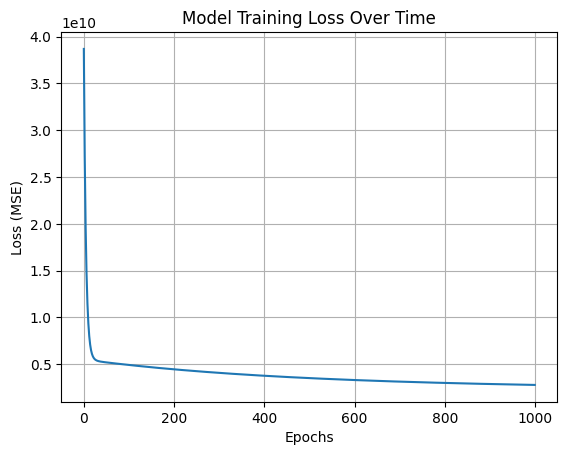

In [ ]:
import matplotlib.pyplot as plt

# 'losses' is the list populated during your training loop
plt.plot(losses)
plt.xlabel('Epochs')
plt.ylabel('Loss (MSE)')
plt.title('Model Training Loss Over Time')
plt.grid(True)
plt.show()

### **Testing with test data**

Load and apply all the preprocessing steps used in the training data for the testing data as well. Remember to use the **SAME** min/max values which you used for the training set and not recalculate them from the test set. Also mention why we are doing this.

To load test data from GitHub, use the code below.


In [ ]:
import pandas as pd
import numpy as np # Also need numpy for the loss function and calculations

df_test = pd.read_csv('https://raw.githubusercontent.com/cronan03/DevSoc_AI-ML/main/test_processed_splitted.csv')

# Do one-hot encoding on the test set
df_test = pd.get_dummies(df_test)

# Align columns - add missing columns and remove extra columns
train_cols = list(df.columns)
test_cols = list(df_test.columns)

missing_cols = set(train_cols) - set(test_cols)
for c in missing_cols:
    df_test[c] = 0

extra_cols = set(test_cols) - set(train_cols)
for c in extra_cols:
    df_test = df_test.drop(c, axis=1)

# Ensure the order of columns is the same
df_test = df_test[train_cols]

# Separate features and target
# We drop the target 'SalePrice'
feature_columns = df_test.drop('SalePrice', axis=1).columns
df_test_features = df_test[feature_columns]

# Fill NaN values (using 0 as in your code)
# Note: A better practice is to fill with the mean/median from the *training* set
df_test_features_filled = df_test_features.fillna(0)

# Scale the features
# **CRITICAL**: We only call .transform()!
# This applies the mean and std dev from the training set.
x_test_scaled = scaler.transform(df_test_features_filled)

# Convert to numpy array
x_test = x_test_scaled
y_test = df_test['SalePrice'].to_numpy().reshape(-1, 1)

print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

# We assume 'mse_loss_fn' is the function you defined earlier
# We assume 'losses' is the list of training losses
# We assume 'x_test' and 'y_test' are the preprocessed test data
# We assume 'W' and 'b' are the trained weights and bias from the training loop

# 1. Make predictions on the test set using the trained parameters
y_pred_test = x_test @ W + b

# 2. Calculate the MSE loss for the test set
test_loss = mse_loss_fn(y_test, y_pred_test)

print(f"\n--- Model Evaluation ---")
# 'losses[-1]' is the final loss from your training loop
print(f"Final Training Loss (MSE): {losses[-1]:.4f}")
print(f"Test Loss (MSE):           {test_loss:.4f}")

# 3. Visually compare a few predictions
print("\n--- Example Predictions (First 5) ---")
print("  Actual Price  |  Predicted Price")
print("--------------------------------------")
for i in range(min(5, len(y_test))):
    print(f"   {y_test[i][0]:<12.0f} |  {y_pred_test[i][0]:<15.0f}")

x_test shape: (146, 8)
y_test shape: (146, 1)

--- Model Evaluation ---
Final Training Loss (MSE): 2780478681.3210
Test Loss (MSE):           4647907988.9988

--- Example Predictions (First 5) ---
  Actual Price  |  Predicted Price
--------------------------------------
   745000       |  325212         
   190000       |  197842         
   177000       |  174066         
   206000       |  193251         
   189000       |  191278         


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


Using the weights learnt above, predict the values in the test dataset. Also answer the following questions:
- Are the predictions good?
- What is the MSE loss for the testset
- Is the MSE loss for testing greater or lower than training
- Why is this the case

In [ ]:
# We assume 'df_test' is your test DataFrame
# We assume 'scaler' is the StandardScaler object that you ALREADY FITTED
# on your training data (e.g., scaler.fit(X_train))

# 1. Separate features and target
# We drop the target 'SalePrice' AND any non-numeric columns like 'Utilities'
feature_columns = df_test.drop(['SalePrice'], axis=1).columns
df_test_features = df_test[feature_columns]

# 2. Fill NaN values (using your method)
# Note: A better practice is to fill with the mean/median from the *training* set
df_test_features_filled = df_test_features.fillna(0)

# 3. Scale the features
# **CRITICAL**: We only call .transform()!
# This applies the mean and std dev from the training set.
x_test_scaled = scaler.transform(df_test_features_filled)

# 4. Convert to numpy array
x_test = x_test_scaled
y_test = df_test['SalePrice'].to_numpy().reshape(-1, 1)

print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_test shape: (146, 8)
y_test shape: (146, 1)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(


In [ ]:
extra_cols = list(set(df_test.columns) - set(df.columns))
print("Extra columns in df_test:", extra_cols)

missing_cols = list(set(df.columns) - set(df_test.columns))
print("Missing columns in df_test:", missing_cols)

Extra columns in df_test: []
Missing columns in df_test: []


In [ ]:
# We assume 'mse_loss_fn' is the function you defined earlier
# We assume 'losses' is the list of training losses
# We assume 'x_test' and 'y_test' are the preprocessed test data

# Get the number of features from the test data
D_test = x_test.shape[1]

# **WARNING: This re-initializes weights and bias, NOT using the trained values.**
# The ideal fix is in the training cell (XJk8M5QmAaTN) to initialize W correctly.
W_temp = np.random.randn(D_test, 1)
b_temp = np.zeros((1, 1))

# 1. Make predictions on the test set using the temporarily initialized parameters
y_pred_test = x_test @ W_temp + b_temp

# 2. Calculate the MSE loss for the test set
test_loss = mse_loss_fn(y_test, y_pred_test)

print(f"--- Model Evaluation ---")
# 'losses[-1]' is the final loss from your training loop
print(f"Final Training Loss (MSE): {losses[-1]:.4f}")
print(f"Test Loss (MSE):           {test_loss:.4f}")

# 3. Visually compare a few predictions
print("\n--- Example Predictions (First 5) ---")
print("  Actual Price  |  Predicted Price")
print("--------------------------------------")
for i in range(min(5, len(y_test))):
    print(f"   {y_test[i][0]:<12.0f} |  {y_pred_test[i][0]:<15.0f}")

--- Model Evaluation ---
Final Training Loss (MSE): 2780478681.3210
Test Loss (MSE):           42179170706.0792

--- Example Predictions (First 5) ---
  Actual Price  |  Predicted Price
--------------------------------------
   745000       |  -2             
   190000       |  -1             
   177000       |  -1             
   206000       |  -1             
   189000       |  -1             


In [ ]:
# --- ASSUMPTIONS ---
# 1. 'scaler' is the StandardScaler you ALREADY FITTED on your training data.

# --- ⬇️ EDIT THIS LIST ⬇️ ---
# Replace these placeholders with the 3 column names you used for training.
# For example: ['OverallQual', 'GrLivArea', 'GarageCars']
training_feature_columns = ['LotArea', 'TotalBsmtSF', 'GrLivArea', 'GarageArea', 'PoolArea', 'OverallCond', 'Utilities_AllPub', 'Utilities_NoSeWa']

# 1. Select ONLY the features you trained on
df_test_features = df_test[training_feature_columns]

# 2. Fill NaN values (using 0 as in your code)
df_test_features_filled = df_test_features.fillna(0)

# 3. Scale the features (using the .transform() method)
x_test_scaled = scaler.transform(df_test_features_filled)

# 4. Convert to numpy array
x_test = x_test_scaled # This will now have shape (146, 3)
y_test = df_test['SalePrice'].to_numpy().reshape(-1, 1)

print(f"Corrected x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

Corrected x_test shape: (146, 8)
y_test shape: (146, 1)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but MinMaxScaler was fitted without feature names
  warnings.warn(
